# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import the Required Libraries 
import numpy as np
import pandas as pd
import json
import time
import math
import re
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import matplotlib.style as style 
import seaborn as sns
import requests
from functools import reduce
%matplotlib inline

In [2]:
pip uninstall tweepy --yes

Found existing installation: tweepy 4.4.0
Uninstalling tweepy-4.4.0:
  Successfully uninstalled tweepy-4.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tweepy

  Using cached tweepy-4.4.0-py2.py3-none-any.whl (65 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
# read the Twitter Enhanced Archives
twarch = pd.read_csv('twitter-archive-enhanced.csv', parse_dates=True)
twarch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
# read the Twitter Image Predictions 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
response.status_code
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [6]:
# read the Twitter Image Predictions file into an Pandas DataFrame
twpred = pd.read_csv('image-predictions.tsv', sep='\t')
twpred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
# load twitter API data
with open('tweet-json.txt') as f:
    twapi = pd.DataFrame((json.loads(line) for line in f), columns = ['id', 'favorite_count', 'retweet_count'])

In [8]:
# change column names
twapi.columns = ['tweet_id', 'favorites', 'retweets']

In [9]:
# use tweet id column as index
twapi.set_index('tweet_id', inplace = True)

In [10]:
# display few lines
twapi.head()

,favorites,retweets
tweet_id,,
892420643555336193,39467,8853
892177421306343426,33819,6514
891815181378084864,25461,4328
891689557279858688,42908,8964
891327558926688256,41048,9774


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



1. Assess Twitter Archive Data 

In [11]:
# print the first few rows of the Twitter Archives
twarch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
# print a summary of a DataFrame
twarch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
# check if ids are unique
twarch.index.is_unique

True

In [14]:
# check number of replies
np.isfinite(twarch.in_reply_to_status_id).sum()

78

In [15]:
# check number of retweets
np.isfinite(twarch.retweeted_status_id).sum()

181

In [16]:
# check name of dog
twarch.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Mac          1
Josep        1
Dixie        1
Karma        1
Evy          1
Name: name, Length: 957, dtype: int64

In [17]:
# check if dogs have more than one category assigned
categories = ['doggo', 'floofer', 'pupper', 'puppo']

for category in categories:
    twarch[category] = twarch[category].apply(lambda x: 0 if x == 'None' else 1)

twarch['number_categories'] = twarch.loc[:,categories].sum(axis = 1)

In [18]:
# dogs categories
twarch['number_categories'].value_counts()

0    1976
1     366
2      14
Name: number_categories, dtype: int64

In [19]:
# check rating denominator
twarch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
0         1
120       1
7         1
170       1
150       1
130       1
90        1
110       1
2         1
70        1
40        1
16        1
15        1
Name: rating_denominator, dtype: int64

In [20]:
# check ratings with denominator greather than 10
twarch[twarch.rating_denominator > 10][['text', 'rating_denominator']]

,text,rating_denominator
342,@docmisterio account started on 11/15/15,15
433,The floofs have been released I repeat the flo...,70
784,"RT @dog_rates: After so many requests, this is...",11
902,Why does this never happen at my front door......,150
1068,"After so many requests, this is Bretagne. She ...",11
1120,Say hello to this unbelievably well behaved sq...,170
1165,Happy 4/20 from the squad! 13/10 for all https...,20
1202,This is Bluebert. He just saw that both #Final...,50
1228,Happy Saturday here's 9 puppers on a bench. 99...,90
1254,Here's a brigade of puppers. All look very pre...,80


In [21]:
# check rating numerator
twarch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
0         2
15        2
75        2
420       2
182       1
204       1
143       1
121       1
99        1
20        1
45        1
27        1
17        1
24        1
26        1
44        1
50        1
60        1
80        1
84        1
88        1
1776      1
960       1
666       1
144       1
165       1
Name: rating_numerator, dtype: int64

In [22]:
# check for any float ratings in the text column

with pd.option_context('max_colwidth', 200):
    display(twarch[twarch['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/Users/brinxu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [23]:
# check expanded urls
twarch[~twarch.expanded_urls.str.startswith(('https://twitter.com','http://twitter.com', 'https://vine.co'), na=False)].sample(3)[['text','expanded_urls']]


,text,expanded_urls
1523,12/10 @LightningHoltt,NaN
498,I've been informed by multiple sources that th...,NaN
30,@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN


In [24]:
# check for two or more urls in the expanded urls
twarch[twarch.expanded_urls.str.contains(',', na = False)].expanded_urls.count()

639

2. Assess Image Predictions data

In [25]:
twpred.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
620,680473011644985345,https://pbs.twimg.com/media/CXGGlzvWYAArPfk.jpg,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,1.625340e-02,True
1906,852311364735569921,https://pbs.twimg.com/media/C9QEqZ7XYAIR7fS.jpg,1,barbell,0.971581,False,dumbbell,0.028418,False,go-kart,5.595040e-07,False
588,679111216690831360,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,kelpie,0.189423,True,beagle,0.121988,True,basset,1.211710e-01,True
931,703079050210877440,https://pbs.twimg.com/media/CcHWqQCW8AEb0ZH.jpg,2,Pembroke,0.778503,True,Shetland_sheepdog,0.093834,True,Cardigan,6.029640e-02,True
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,8.251460e-02,True
1275,750056684286914561,https://pbs.twimg.com/media/Cmfx2oNW8AAGg4H.jpg,1,Saluki,0.484428,True,borzoi,0.263550,True,Labrador_retriever,7.700380e-02,True
160,668902994700836864,https://pbs.twimg.com/media/CUhruUgUAAAa8FQ.jpg,1,Brittany_spaniel,0.828425,True,Ibizan_hound,0.043082,True,Blenheim_spaniel,2.800360e-02,True
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,4.640320e-02,True
1301,752682090207055872,https://pbs.twimg.com/media/CnIQXdYWgAAnsZZ.jpg,2,German_shepherd,0.299966,True,Eskimo_dog,0.278355,True,Siberian_husky,1.785200e-01,True
1445,775842724423557120,https://pbs.twimg.com/media/CsRY1jAWYAUOx55.jpg,2,chow,0.520022,True,bath_towel,0.028775,False,French_bulldog,2.599010e-02,True


In [26]:
twpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
# check jpg_url for duplicates
sum(twpred.jpg_url.duplicated())

66

In [28]:
# check jpg_url to confirm if it contains only jpg and png images
twpred[~twpred.jpg_url.str.endswith(('.jpg', '.png'), na = False)].jpg_url.count()

0

In [29]:
twpred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [30]:
# check dog predictions
twpred.p1_dog.count()

2075

3. Assess Twitter API Data

In [31]:
twapi.sample(3)

,favorites,retweets
tweet_id,,
693647888581312512,2961,673
741303864243200000,9631,3650
678675843183484930,3155,1680


In [32]:
twapi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   favorites  2354 non-null   int64
 1   retweets   2354 non-null   int64
dtypes: int64(2)
memory usage: 55.2 KB


In [33]:
# check if ids are unique
twapi.index.is_unique

True

### Quality issues 
- Some of the gathered tweets are replies that should be removed.
- Some of the gathered tweets are retweets that should be removed. 
- Denominator of some ratings is not 10
- Numerator of some ratings is greater than 10
- Float ratings have been incorrectly read from the text of the tweet.
- We have 639 expanded URLs which contain more than one URL address.
- Source column has HTTP code that needs to be removed.
- 66 jpg_url duplicates were found.

### Tidiness issues
- Dog 'stage' classification (doggo, floofer, pupper or puppo) should be one column.
- Twitter API and Twitter predictions datasets need to be joined to Twitter archives.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [34]:
# Make copies of original pieces of data
twarch_clean = twarch.copy()

### Quality Issue #1: Some of the gathered tweets are retweets and need to be removed

#### Code

In [35]:
# drop retweets                                                 
twarch_clean = twarch_clean[twarch_clean['retweeted_status_id'].isnull()]

#### Test

In [36]:
print(sum(twarch_clean.retweeted_status_user_id.value_counts()))

0


### Quality Issue #2: Some of the gathered tweets are replies and should be removed

#### Code

In [37]:
twarch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
           'retweeted_status_user_id','retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [38]:
twarch_clean.shape

(2175, 13)

### Quality Issue #3: Denominator and numerator of some ratings are invalid

#### Code

In [39]:
# manually fix denominator that was read incorrectly

twarch_clean.loc[832088576586297345, 'rating_denominator'] = 0
twarch_clean.loc[775096608509886464, 'rating_denominator'] = 10
twarch_clean.loc[740373189193256964, 'rating_denominator'] = 10
twarch_clean.loc[722974582966214656, 'rating_denominator'] = 10
twarch_clean.loc[716439118184652801, 'rating_denominator'] = 10
twarch_clean.loc[682962037429899265, 'rating_denominator'] = 10

twarch_clean.loc[832088576586297345, 'rating_numerator'] = 0
twarch_clean.loc[775096608509886464, 'rating_numerator'] = 14
twarch_clean.loc[740373189193256964, 'rating_numerator'] = 14
twarch_clean.loc[722974582966214656, 'rating_numerator'] = 13
twarch_clean.loc[716439118184652801, 'rating_numerator'] = 11
twarch_clean.loc[682962037429899265, 'rating_numerator'] = 10

#### Test

In [40]:
twarch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 682962037429899265
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2175 non-null   float64
 1   timestamp           2175 non-null   object 
 2   source              2175 non-null   object 
 3   text                2175 non-null   object 
 4   expanded_urls       2117 non-null   object 
 5   rating_numerator    2181 non-null   float64
 6   rating_denominator  2181 non-null   float64
 7   name                2175 non-null   object 
 8   doggo               2175 non-null   float64
 9   floofer             2175 non-null   float64
 10  pupper              2175 non-null   float64
 11  puppo               2175 non-null   float64
 12  number_categories   2175 non-null   float64
dtypes: float64(8), object(5)
memory usage: 303.1+ KB


### Quality Issue #4: Timestamp has an incorrect datatype - is an object, should be DateTime

#### Code

In [41]:
# convert to datetime
twarch_clean.timestamp = pd.to_datetime(twarch_clean.timestamp)

#### Test

In [42]:
# display dataset types
twarch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2181 entries, 0 to 682962037429899265
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   float64            
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   expanded_urls       2117 non-null   object             
 5   rating_numerator    2181 non-null   float64            
 6   rating_denominator  2181 non-null   float64            
 7   name                2175 non-null   object             
 8   doggo               2175 non-null   float64            
 9   floofer             2175 non-null   float64            
 10  pupper              2175 non-null   float64            
 11  puppo               2175 non-null   float64            
 12  number_categories   

### Quality Issue #5: Float ratings have been incorrectly read from the text of tweet

#### Code

In [43]:
# convert both columns to floats
twarch_clean['rating_numerator'] = twarch_clean['rating_numerator'].astype(float)
twarch_clean['rating_denominator'] = twarch_clean['rating_denominator'].astype(float)

# find columns with fractions
fraction_ratings = twarch_clean[twarch_clean.text.str.contains(r'\d+\.\d+\/\d+', na = False)].index

# extract correct rating and replace incorrect one
for index in fraction_ratings:
    rating = re.search('\d+\.\d+\/\d+', twarch_clean.loc[index,:].text).group(0)
    twarch_clean.at[index,'rating_numerator'], twarch_clean.at[index,'rating_denominator'] = rating.split('/')

#### Test

In [44]:
twarch_clean.loc[fraction_ratings,:][['text','rating_denominator', 'rating_numerator']].sample(3)

,text,rating_denominator,rating_numerator
45,This is Bella. She hopes her smile made you sm...,10.0,13.50
695,"This is Logan, the Chow who lived. He solemnly...",10.0,9.75
1689,I've been told there's a slight possibility he...,10.0,9.50


### Quality Issue #6: Some expanded urls which contain more than one url address

#### Code

In [45]:
for index, column in twarch_clean.iterrows():
    twarch_clean.loc[index, 'expanded_urls'] = 'https://twitter.com/dog_rates/status/' + str(index)

#### Test

In [46]:
twarch_clean.sample(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,number_categories
1069,7.403651e+17,2016-06-08 02:09:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,https://twitter.com/dog_rates/status/1069,10.0,10.0,None,0.0,0.0,0.0,0.0,0.0
1787,6.775657e+17,2015-12-17 19:07:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Contortionist pup here. Inside pentagram. Clea...,https://twitter.com/dog_rates/status/1787,6.0,10.0,None,0.0,0.0,0.0,0.0,0.0
1344,7.044998e+17,2016-03-01 02:53:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you wake up from a long nap and have no i...,https://twitter.com/dog_rates/status/1344,12.0,10.0,None,0.0,0.0,0.0,0.0,0.0


### Quality Issue #7: Source column has HTTP code

#### Code

In [47]:
twarch_clean['source'] = twarch_clean['source'].str.extract('(<a href="https?)(:\/\/)(.+)(">)(.+)(<\/a)', expand = True)[4];
twarch_clean['source'] = twarch_clean['source'].astype('category')

#### Test

In [48]:
twarch_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality Issue #8: Some image_url are duplicated

#### Code

In [49]:
twpred_clean = twpred.copy()

In [50]:
twpred_clean = twpred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test

In [51]:
sum(twpred_clean['jpg_url'].duplicated())

0

### Tidiness Issue #1: Dog 'stage' classification should be one column

#### Code

In [52]:
# read dog types from text column
for index, column in twarch_clean.iterrows():
    for word in ['puppo', 'pupper', 'doggo', 'floofer']:
        if word.lower() in str(twarch_clean.loc[index, 'text']).lower():
            twarch_clean.loc[index, 'dog_type'] = word.title()
            
# drop old columns
twarch_clean.drop(['puppo',
                   'pupper',
                   'doggo',
                   'floofer'],
                   axis=1, inplace=True)

#### Test

In [53]:
twarch_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,number_categories,dog_type
214,8.514648e+17,2017-04-10 16:00:07+00:00,Twitter for iPhone,This is Iggy. He was a rescue dog killed in th...,https://twitter.com/dog_rates/status/214,14.0,10.0,Iggy,0.0,NaN
641,7.932261e+17,2016-10-31 23:00:11+00:00,Twitter for iPhone,"This is Juno. She spooked me up real good, but...",https://twitter.com/dog_rates/status/641,11.0,10.0,Juno,0.0,NaN
1138,7.280353e+17,2016-05-05 01:35:26+00:00,Twitter for iPhone,This is all I want in my life. 12/10 for super...,https://twitter.com/dog_rates/status/1138,12.0,10.0,all,1.0,Pupper
985,7.490753e+17,2016-07-02 03:00:36+00:00,Vine - Make a Scene,This is Boomer. He's self-baptizing. Other dog...,https://twitter.com/dog_rates/status/985,11.0,10.0,Boomer,1.0,Doggo
1041,7.439800e+17,2016-06-18 01:33:55+00:00,Twitter for iPhone,This is Geno. He's a Wrinkled Baklavian Velvee...,https://twitter.com/dog_rates/status/1041,11.0,10.0,Geno,0.0,NaN


### Tidiness Issue #2: Twitter API and Twitter predictions need to be joined with Twitter archives data

#### Code

In [54]:
from functools import reduce
df = reduce(lambda left, right: pd.merge(left, right, on='tweet_id'), [twarch_clean, twpred_clean, twapi])

#### Test

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1253 non-null   float64            
 1   timestamp           1253 non-null   datetime64[ns, UTC]
 2   source              1253 non-null   category           
 3   text                1253 non-null   object             
 4   expanded_urls       1253 non-null   object             
 5   rating_numerator    1253 non-null   float64            
 6   rating_denominator  1253 non-null   float64            
 7   name                1253 non-null   object             
 8   number_categories   1253 non-null   float64            
 9   dog_type            214 non-null    object             
 10  jpg_url             1253 non-null   object             
 11  img_num             1253 non-null   int64              
 12  p1                  1253 non-null 

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [56]:
df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [57]:
tweets = pd.read_csv('twitter_archive_master.csv')

### Insight #1: What is the most popular dog source? 

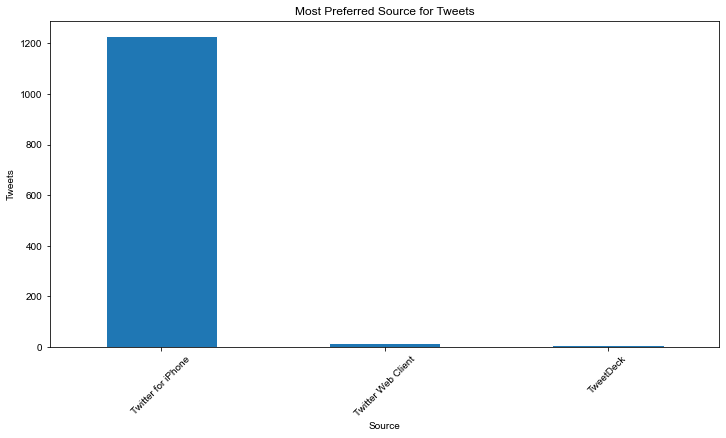

In [58]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
tweets.source.value_counts().plot.bar()
plt.xticks(rotation=45)
plt.xlabel('Source')
plt.ylabel('Tweets')
plt.title('Most Preferred Source for Tweets')
plt.grid(b=None)
plt.show()

### Insight #2: What are the most popular dog Type?

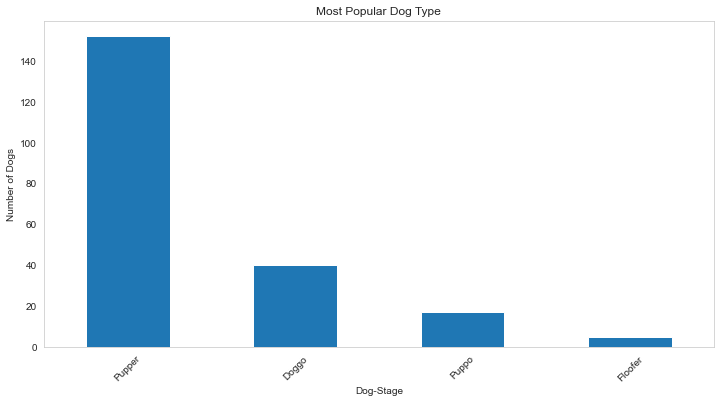

In [59]:
fig, ax = plt.subplots(figsize = (12,6))
sns.set_style("whitegrid")
my_palette = ['#66b3ff', '#00cc99', '#ff6666', '#ffff66', '#8c66ff', '#66ffd9']
sns.color_palette(my_palette)
tweets.dog_type.value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('Dog-Stage')
plt.xticks(rotation=45)
plt.ylabel('Number of Dogs')
plt.title('Most Popular Dog Type')
plt.grid(b=None)
plt.show()

### Insight #3. What is the trend of favorites and retweets numbers?

No handles with labels found to put in legend.


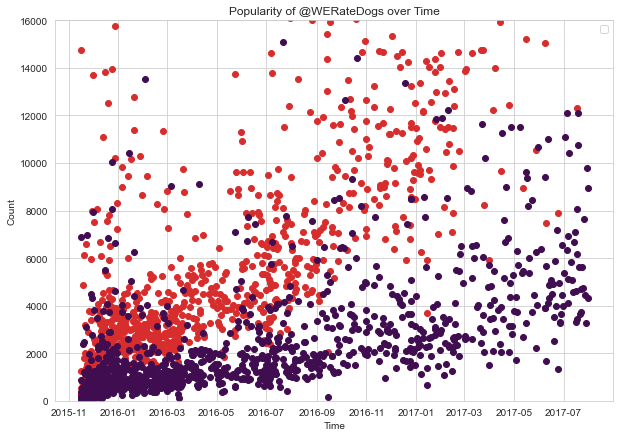

In [60]:
d = pd.DataFrame(df.timestamp)
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,df.favorites, color="#d82d2d")
ax.plot_date(d,df.retweets, color="#410d51")
ax.set_ylim([0,16000])
ax.set_title('Popularity of @WERateDogs over Time')

# Setting x and y labels.
ax.set_ylabel('Count')
ax.set_xlabel('Time')
ax.legend()